## Could machine learning build a model for prime numbers?

In [1]:
# Prime number as classification problem
# Created by: Sergiu Iatco | 2023.02.10
# https://people.sap.com/sergiu.iatco
# https://ro.linkedin.com/in/sergiuiatco

In [2]:
from platform import python_version
python_version()

'3.8.16'

In [3]:
# conda install -c anaconda scipy
# conda create --name prime python=3.8
# conda install -c conda-forge scikit-learn
# conda install -c anaconda jupyter
# conda install -c conda-forge matplotlib
# conda install -c anaconda pandas
# conda install -c conda-forge xgboost
# conda update xgboost
# pip install xgboost
# pip show xgboost

# # https://stackabuse.com/bytes/fix-no-module-named-xgboost-importerror-in-jupyter-notebook/
# import sys
# !{sys.executable} -m pip install xgboost

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [5]:
pd.set_option("display.max_columns", None)

### 1. Intervals with prime numbers

In [7]:
n_power = 5 # interval exponent
# n_shifts = 15

In [8]:
# https://stackoverflow.com/questions/11619942/print-series-of-prime-numbers-in-python
def primes(n):
    out = list()
    sieve = [True] * (n+1)
    
    ls_prime = list()
    ls_pm_int = list()
    curr_int = 0
    for p in range(2, n+1):
        v_int = int(p/10)
        if curr_int < v_int:
            ls_prime.append([curr_int, ls_pm_int])
            curr_int = v_int
            ls_pm_int = list()
        
        if (sieve[p]):
            out.append(p)
            
            ls_pm_int.append(p)
            
            for i in range(p, n+1, p):
                sieve[i] = False
            
    return out, ls_prime  

In [9]:
# primes(110)

In [10]:
out, ls_prime = primes(10**n_power)
len(out), len(ls_prime), len(out) / ( len(ls_prime) * 10 )

(9592, 10000, 0.09592)

In [11]:
out[-8:] # last 8 prime

[99901, 99907, 99923, 99929, 99961, 99971, 99989, 99991]

In [12]:
ls_prime[-3:] # last 3 intervals

[[9997, [99971]], [9998, [99989]], [9999, [99991]]]

In [13]:
del ls_prime[0] # delete prime 1, 2, 3, 5, 7
ls_prime[:3] # check first three intervals

[[1, [11, 13, 17, 19]], [2, [23, 29]], [3, [31, 37]]]

### 2. Intervals with the last digit of the prime

In [14]:
# transform 0 - not prime, 1 - prime
# example for 10 to 19 -> 11, 13, 17, 19 -> 1111 | for 20 to t 29 -> 23, 29 -> 0101
def f_prime_cls(prime_el):
    lc_dict_prime = {'1':0, '3':1, '7':2, '9':3}
    lc_ls_cls = ['0','0','0','0']
    for i in prime_el:
        lc_ls_cls[lc_dict_prime[repr(i)[-1]]] = '1'
    return lc_ls_cls

In [15]:
len(ls_prime) # number of intervals

9999

### 3. Conversion of class into binary
#### If prime 1, else 0.

In [16]:
# binary transform of list 0 - not prime, 1 - prime
ls_prime_new = list()
for i in ls_prime:
    prime_cls = f_prime_cls(i[1])
    ls_prime_new.append([i[0],i[1],prime_cls])

ls_prime_new[-3:] # last 3 intervals

[[9997, [99971], ['1', '0', '0', '0']],
 [9998, [99989], ['0', '0', '0', '1']],
 [9999, [99991], ['1', '0', '0', '0']]]

In [17]:
ls_prime = ls_prime_new

### 4. Conversion of intervals into binary

In [18]:
# transform intervals into binary
ls_prime_new = list()
for i in ls_prime:
    dec_to_bin = "{0:#b}".format(i[0])[2:]
    ls_prime_new.append([i[0], i[1], i[2], dec_to_bin])
len(ls_prime_new)

9999

In [19]:
ls_prime_new[-3:] # last 3 intervals

[[9997, [99971], ['1', '0', '0', '0'], '10011100001101'],
 [9998, [99989], ['0', '0', '0', '1'], '10011100001110'],
 [9999, [99991], ['1', '0', '0', '0'], '10011100001111']]

### 5. Splitting binary intervals into columns

In [20]:
ls_prime = ls_prime_new

In [21]:
# join class list join ['1', '0', '0', '0'] -> 1000
ls_prime_new = list()
for i in ls_prime:
    cls = i[2]
    cls_joined = ''.join(cls)
    bin = i[3]
    ls_prime_new.append([i, [bin, cls_joined]])

len(ls_prime_new), ls_prime_new[-3]

(9999,
 [[9997, [99971], ['1', '0', '0', '0'], '10011100001101'],
  ['10011100001101', '1000']])

In [22]:
# list intervals in binary
ls_bin = [i[-1][0] for i in ls_prime_new]
ls_bin[-3:]

['10011100001101', '10011100001110', '10011100001111']

In [23]:
# list of classes
ls_cls = [i[-1][1] for i in ls_prime_new]
ls_cls[-3:]

['1000', '0001', '1000']

In [24]:
df = pd.DataFrame(list(zip(ls_bin, ls_cls)),
                  columns =['bin', 'cls'])
df.head()

,bin,cls
0,1,1111
1,10,0101
2,11,1010
3,100,1110
4,101,0101


In [25]:
df.tail()

,bin,cls
9994,10011100001011,0000
9995,10011100001100,1000
9996,10011100001101,1000
9997,10011100001110,0001
9998,10011100001111,1000


In [26]:
# max length of interval
ls_bin_len = [len(x) for x in ls_bin]  
max_bin = max(ls_bin_len)
max_bin

14

In [27]:
# max length of class
ls_cls_len = [len(x) for x in ls_cls]
max_cls_len = max(ls_cls_len)
max_cls_len

4

In [28]:
df.head()

,bin,cls
0,1,1111
1,10,0101
2,11,1010
3,100,1110
4,101,0101


In [29]:
df.tail()

,bin,cls
9994,10011100001011,0000
9995,10011100001100,1000
9996,10011100001101,1000
9997,10011100001110,0001
9998,10011100001111,1000


In [30]:
df['bin_pad'] = df['bin'] # column for padding with 0

In [31]:
df.head(10)

,bin,cls,bin_pad
0,1,1111,1
1,10,0101,10
2,11,1010,11
3,100,1110,100
4,101,0101,101
5,110,1010,110
6,111,1101,111
7,1000,0101,1000
8,1001,0010,1001
9,1010,1111,1010


In [32]:
df['bin_pad'] = df['bin'].str.rjust(max_bin,'0') # padding

In [33]:
df.head()

,bin,cls,bin_pad
0,1,1111,00000000000001
1,10,0101,00000000000010
2,11,1010,00000000000011
3,100,1110,00000000000100
4,101,0101,00000000000101


In [34]:
df.head()

,bin,cls,bin_pad
0,1,1111,00000000000001
1,10,0101,00000000000010
2,11,1010,00000000000011
3,100,1110,00000000000100
4,101,0101,00000000000101


In [35]:
df.tail()

,bin,cls,bin_pad
9994,10011100001011,0000,10011100001011
9995,10011100001100,1000,10011100001100
9996,10011100001101,1000,10011100001101
9997,10011100001110,0001,10011100001110
9998,10011100001111,1000,10011100001111


In [36]:
# x_b - binary into columns
x_cols = list()
# for c, _ in enumerate(list(max(ls_bin))):
for i in range(max_bin):
    x_col = 'x_b'+str(i)
    df[x_col] = df['bin_pad'].str[i]
    x_cols.append(x_col)

In [37]:
df.head()

,bin,cls,bin_pad,x_b0,x_b1,x_b2,x_b3,x_b4,x_b5,x_b6,x_b7,x_b8,x_b9,x_b10,x_b11,x_b12,x_b13
0,1,1111,00000000000001,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,10,0101,00000000000010,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,11,1010,00000000000011,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,100,1110,00000000000100,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,101,0101,00000000000101,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [38]:
df.tail()

,bin,cls,bin_pad,x_b0,x_b1,x_b2,x_b3,x_b4,x_b5,x_b6,x_b7,x_b8,x_b9,x_b10,x_b11,x_b12,x_b13
9994,10011100001011,0000,10011100001011,1,0,0,1,1,1,0,0,0,0,1,0,1,1
9995,10011100001100,1000,10011100001100,1,0,0,1,1,1,0,0,0,0,1,1,0,0
9996,10011100001101,1000,10011100001101,1,0,0,1,1,1,0,0,0,0,1,1,0,1
9997,10011100001110,0001,10011100001110,1,0,0,1,1,1,0,0,0,0,1,1,1,0
9998,10011100001111,1000,10011100001111,1,0,0,1,1,1,0,0,0,0,1,1,1,1


In [39]:
# x_cols

In [40]:
max_cls_len

4

In [41]:
# x_c - class into columns
x_c_cols = list()
for i in range(max_cls_len):
    x_c_col = 'x_c'+str(i)
    df[x_c_col] = df['cls'].str[i]
    x_c_cols.append(x_c_col)

In [42]:
df.tail()

,bin,cls,bin_pad,x_b0,x_b1,x_b2,x_b3,x_b4,x_b5,x_b6,x_b7,x_b8,x_b9,x_b10,x_b11,x_b12,x_b13,x_c0,x_c1,x_c2,x_c3
9994,10011100001011,0000,10011100001011,1,0,0,1,1,1,0,0,0,0,1,0,1,1,0,0,0,0
9995,10011100001100,1000,10011100001100,1,0,0,1,1,1,0,0,0,0,1,1,0,0,1,0,0,0
9996,10011100001101,1000,10011100001101,1,0,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0
9997,10011100001110,0001,10011100001110,1,0,0,1,1,1,0,0,0,0,1,1,1,0,0,0,0,1
9998,10011100001111,1000,10011100001111,1,0,0,1,1,1,0,0,0,0,1,1,1,1,1,0,0,0


In [43]:
# x_c_cols

In [44]:
# DataFrame for bands - series of previous rows
df_bd = df.copy()
df_bd.head()

,bin,cls,bin_pad,x_b0,x_b1,x_b2,x_b3,x_b4,x_b5,x_b6,x_b7,x_b8,x_b9,x_b10,x_b11,x_b12,x_b13,x_c0,x_c1,x_c2,x_c3
0,1,1111,00000000000001,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
1,10,0101,00000000000010,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
2,11,1010,00000000000011,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0
3,100,1110,00000000000100,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0
4,101,0101,00000000000101,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1


In [45]:
# x_cols - global

In [46]:
x_c_cols

['x_c0', 'x_c1', 'x_c2', 'x_c3']

### 6. Reorganizing data with a sliding window

In [47]:
def f_shifts(p_n_shifts, p_df_bd):
    lc_x_cols =  x_cols # global
    lc_x_c_cols = x_c_cols # global
    lc_c_b = 'b'
    lc_c_cls = 'cls'
    lc_x_bd_b_cols = list()
    lc_x_bd_c_cols = list()
    lc_df_bd = p_df_bd.copy()
    
    for i_shift in range(0, p_n_shifts):
        for e_col in lc_x_cols:
            lc_col_bd = str(i_shift).rjust(2,'0')+'_'+e_col
            lc_df_i = pd.DataFrame()

            lc_df_i[lc_col_bd] = lc_df_bd[e_col].shift(i_shift).copy()

            lc_df_bd = lc_df_bd.join(lc_df_i)
            lc_x_bd_b_cols.append(lc_col_bd)

        if i_shift != 0: #include only c(cls) from previous bands # current 00_x_c* = cls
            for e_c_col in lc_x_c_cols:
                lc_col_c_bd = str(i_shift).rjust(2,'0')+'_'+e_c_col
                lc_df_i = pd.DataFrame()
                lc_df_i[lc_col_c_bd] = lc_df_bd[e_c_col].shift(i_shift).copy()
                lc_df_bd = lc_df_bd.join(lc_df_i)
                lc_x_bd_c_cols.append(lc_col_c_bd)
    
    return lc_df_bd, lc_x_bd_c_cols, lc_x_bd_b_cols

In [48]:
df.shape

(9999, 21)

In [49]:
# test df_bd
n_shifts = 0
df_bd = df.copy()
df_bd, x_bd_c_cols, x_bd_b_cols = f_shifts(n_shifts, df_bd)
df_bd.shape

(9999, 21)

####  Testing model and data

In [50]:
n_shifts = 3
df_bd = df.copy()
df_bd, x_bd_c_cols, x_bd_b_cols = f_shifts(n_shifts, df_bd)
df_bd.shape

(9999, 71)

In [51]:
df_bd

,bin,cls,bin_pad,x_b0,x_b1,x_b2,x_b3,x_b4,x_b5,x_b6,x_b7,x_b8,x_b9,x_b10,x_b11,x_b12,x_b13,x_c0,x_c1,x_c2,x_c3,00_x_b0,00_x_b1,00_x_b2,00_x_b3,00_x_b4,00_x_b5,00_x_b6,00_x_b7,00_x_b8,00_x_b9,00_x_b10,00_x_b11,00_x_b12,00_x_b13,01_x_b0,01_x_b1,01_x_b2,01_x_b3,01_x_b4,01_x_b5,01_x_b6,01_x_b7,01_x_b8,01_x_b9,01_x_b10,01_x_b11,01_x_b12,01_x_b13,01_x_c0,01_x_c1,01_x_c2,01_x_c3,02_x_b0,02_x_b1,02_x_b2,02_x_b3,02_x_b4,02_x_b5,02_x_b6,02_x_b7,02_x_b8,02_x_b9,02_x_b10,02_x_b11,02_x_b12,02_x_b13,02_x_c0,02_x_c1,02_x_c2,02_x_c3
0,1,1111,00000000000001,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,0101,00000000000010,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11,1010,00000000000011,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
3,100,1110,00000000000100,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,101,0101,00000000000101,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,10011100001011,0000,10011100001011,1,0,0,1,1,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1,0,1,1,1,0,0,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0
9995,10011100001100,1000,10011100001100,1,0,0,1,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,1,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0
9996,10011100001101,1000,10011100001101,1,0,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,1,0,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,1,0,0,0,0,1,0,1,1,0,0,0,0
9997,10011100001110,0001,10011100001110,1,0,0,1,1,1,0,0,0,0,1,1,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,1,1,1,0,1,0,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,1,0,0,1,1,1,0,0,0,0,1,1,0,0,1,0,0,0


In [52]:
# df_bd.shape

In [53]:
# df_bd[x_bd_c_cols]

In [54]:
# df_bd.head()

In [55]:
df_bd

,bin,cls,bin_pad,x_b0,x_b1,x_b2,x_b3,x_b4,x_b5,x_b6,x_b7,x_b8,x_b9,x_b10,x_b11,x_b12,x_b13,x_c0,x_c1,x_c2,x_c3,00_x_b0,00_x_b1,00_x_b2,00_x_b3,00_x_b4,00_x_b5,00_x_b6,00_x_b7,00_x_b8,00_x_b9,00_x_b10,00_x_b11,00_x_b12,00_x_b13,01_x_b0,01_x_b1,01_x_b2,01_x_b3,01_x_b4,01_x_b5,01_x_b6,01_x_b7,01_x_b8,01_x_b9,01_x_b10,01_x_b11,01_x_b12,01_x_b13,01_x_c0,01_x_c1,01_x_c2,01_x_c3,02_x_b0,02_x_b1,02_x_b2,02_x_b3,02_x_b4,02_x_b5,02_x_b6,02_x_b7,02_x_b8,02_x_b9,02_x_b10,02_x_b11,02_x_b12,02_x_b13,02_x_c0,02_x_c1,02_x_c2,02_x_c3
0,1,1111,00000000000001,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10,0101,00000000000010,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11,1010,00000000000011,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
3,100,1110,00000000000100,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,101,0101,00000000000101,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,10011100001011,0000,10011100001011,1,0,0,1,1,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1,0,1,1,1,0,0,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0
9995,10011100001100,1000,10011100001100,1,0,0,1,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,1,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0
9996,10011100001101,1000,10011100001101,1,0,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,1,0,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,1,1,0,0,0,0,1,0,1,1,0,0,0,0
9997,10011100001110,0001,10011100001110,1,0,0,1,1,1,0,0,0,0,1,1,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,1,1,1,0,1,0,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,1,0,0,1,1,1,0,0,0,0,1,1,0,0,1,0,0,0


In [56]:
# x_bd_c_cols

In [57]:
df_bd.columns

Index(['bin', 'cls', 'bin_pad', 'x_b0', 'x_b1', 'x_b2', 'x_b3', 'x_b4', 'x_b5',
       'x_b6', 'x_b7', 'x_b8', 'x_b9', 'x_b10', 'x_b11', 'x_b12', 'x_b13',
       'x_c0', 'x_c1', 'x_c2', 'x_c3', '00_x_b0', '00_x_b1', '00_x_b2',
       '00_x_b3', '00_x_b4', '00_x_b5', '00_x_b6', '00_x_b7', '00_x_b8',
       '00_x_b9', '00_x_b10', '00_x_b11', '00_x_b12', '00_x_b13', '01_x_b0',
       '01_x_b1', '01_x_b2', '01_x_b3', '01_x_b4', '01_x_b5', '01_x_b6',
       '01_x_b7', '01_x_b8', '01_x_b9', '01_x_b10', '01_x_b11', '01_x_b12',
       '01_x_b13', '01_x_c0', '01_x_c1', '01_x_c2', '01_x_c3', '02_x_b0',
       '02_x_b1', '02_x_b2', '02_x_b3', '02_x_b4', '02_x_b5', '02_x_b6',
       '02_x_b7', '02_x_b8', '02_x_b9', '02_x_b10', '02_x_b11', '02_x_b12',
       '02_x_b13', '02_x_c0', '02_x_c1', '02_x_c2', '02_x_c3'],
      dtype='object')

In [58]:
def f_XY(p_df_bd, p_x_bd_b_cols, p_x_bd_c_cols):
    lc_XY = p_df_bd[p_x_bd_b_cols + p_x_bd_c_cols + ['cls']].copy()
    lc_XY.dropna(axis='rows', inplace=True) # NaN
    lc_X = lc_XY[p_x_bd_b_cols + p_x_bd_c_cols].copy()
    lc_Y = lc_XY['cls'].copy()
    
    return lc_XY, lc_X, lc_Y    

In [59]:
XY, X, Y = f_XY(df_bd, x_bd_b_cols, x_bd_c_cols)

In [60]:
XY.tail()

,00_x_b0,00_x_b1,00_x_b2,00_x_b3,00_x_b4,00_x_b5,00_x_b6,00_x_b7,00_x_b8,00_x_b9,00_x_b10,00_x_b11,00_x_b12,00_x_b13,01_x_b0,01_x_b1,01_x_b2,01_x_b3,01_x_b4,01_x_b5,01_x_b6,01_x_b7,01_x_b8,01_x_b9,01_x_b10,01_x_b11,01_x_b12,01_x_b13,02_x_b0,02_x_b1,02_x_b2,02_x_b3,02_x_b4,02_x_b5,02_x_b6,02_x_b7,02_x_b8,02_x_b9,02_x_b10,02_x_b11,02_x_b12,02_x_b13,01_x_c0,01_x_c1,01_x_c2,01_x_c3,02_x_c0,02_x_c1,02_x_c2,02_x_c3,cls
9994,1,0,0,1,1,1,0,0,0,0,1,0,1,1,1,0,0,1,1,1,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0000
9995,1,0,0,1,1,1,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,0,1,0,1,1,1,0,0,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1000
9996,1,0,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,1000
9997,1,0,0,1,1,1,0,0,0,0,1,1,1,0,1,0,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0001
9998,1,0,0,1,1,1,0,0,0,0,1,1,1,1,1,0,0,1,1,1,0,0,0,0,1,1,1,0,1,0,0,1,1,1,0,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,1000


In [61]:
XY[XY.isna().any(axis=1)]

,00_x_b0,00_x_b1,00_x_b2,00_x_b3,00_x_b4,00_x_b5,00_x_b6,00_x_b7,00_x_b8,00_x_b9,00_x_b10,00_x_b11,00_x_b12,00_x_b13,01_x_b0,01_x_b1,01_x_b2,01_x_b3,01_x_b4,01_x_b5,01_x_b6,01_x_b7,01_x_b8,01_x_b9,01_x_b10,01_x_b11,01_x_b12,01_x_b13,02_x_b0,02_x_b1,02_x_b2,02_x_b3,02_x_b4,02_x_b5,02_x_b6,02_x_b7,02_x_b8,02_x_b9,02_x_b10,02_x_b11,02_x_b12,02_x_b13,01_x_c0,01_x_c1,01_x_c2,01_x_c3,02_x_c0,02_x_c1,02_x_c2,02_x_c3,cls


In [62]:
XY.shape

(9997, 51)

In [63]:
X.tail()

,00_x_b0,00_x_b1,00_x_b2,00_x_b3,00_x_b4,00_x_b5,00_x_b6,00_x_b7,00_x_b8,00_x_b9,00_x_b10,00_x_b11,00_x_b12,00_x_b13,01_x_b0,01_x_b1,01_x_b2,01_x_b3,01_x_b4,01_x_b5,01_x_b6,01_x_b7,01_x_b8,01_x_b9,01_x_b10,01_x_b11,01_x_b12,01_x_b13,02_x_b0,02_x_b1,02_x_b2,02_x_b3,02_x_b4,02_x_b5,02_x_b6,02_x_b7,02_x_b8,02_x_b9,02_x_b10,02_x_b11,02_x_b12,02_x_b13,01_x_c0,01_x_c1,01_x_c2,01_x_c3,02_x_c0,02_x_c1,02_x_c2,02_x_c3
9994,1,0,0,1,1,1,0,0,0,0,1,0,1,1,1,0,0,1,1,1,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
9995,1,0,0,1,1,1,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,0,1,0,1,1,1,0,0,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
9996,1,0,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0
9997,1,0,0,1,1,1,0,0,0,0,1,1,1,0,1,0,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0
9998,1,0,0,1,1,1,0,0,0,0,1,1,1,1,1,0,0,1,1,1,0,0,0,0,1,1,1,0,1,0,0,1,1,1,0,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0


In [64]:
X.shape

(9997, 50)

In [65]:
Y.tail()

9994    0000
9995    1000
9996    1000
9997    0001
9998    1000
Name: cls, dtype: object

In [66]:
X.shape, Y.shape

((9997, 50), (9997,))

In [67]:
def f_y_encoded(p_Y):
    lc_le = LabelEncoder()
    lc_y_encoded = lc_le.fit_transform(p_Y)
    return lc_le, lc_y_encoded

In [68]:
le, y_encoded =  f_y_encoded(Y)

In [69]:
y_encoded[:3]

array([10, 14,  5])

In [70]:
le.classes_

array(['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111',
       '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111'],
      dtype=object)

In [71]:
le.transform(le.classes_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [72]:
def f_split(p_X, p_y_encoded):
    lc_n_tail = 16
#     if X.shape[0] < 10**4:
#         n_tail = 32
    lc_n_head = X.shape[0]-lc_n_tail
    
    # don't shuffle - > we need the tail to predict
    lc_X_train, lc_X_test, lc_y_train, lc_y_test = train_test_split(p_X, p_y_encoded, test_size=lc_n_tail, shuffle = False)

    return lc_X_train, lc_X_test, lc_y_train, lc_y_test

In [73]:
X_train, X_test, y_train, y_test = f_split(X, y_encoded)

In [74]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9981, 50), (16, 50), (9981,), (16,))

In [75]:
# Shuffle X_train, y_trainy
def f_shuffle_Xy_train(p_X_train, p_y_train):

    lc_x1, lc_x2, lc_y1, lc_y2 = train_test_split(p_X_train, p_y_train, shuffle = True)
    lc_X_train = pd.concat([lc_x1, lc_x2])
    lc_y_train = np.concatenate((lc_y1,lc_y2)) 
    return lc_X_train, lc_y_train

In [76]:
X_train_sh, y_train_sh = f_shuffle_Xy_train(X_train, y_train)
# X_train, y_train = X_train_sh, y_train_sh
X_train_sh.shape, y_train_sh.shape

((9981, 50), (9981,))

In [77]:
X_train_sh.head() # check shuffled

,00_x_b0,00_x_b1,00_x_b2,00_x_b3,00_x_b4,00_x_b5,00_x_b6,00_x_b7,00_x_b8,00_x_b9,00_x_b10,00_x_b11,00_x_b12,00_x_b13,01_x_b0,01_x_b1,01_x_b2,01_x_b3,01_x_b4,01_x_b5,01_x_b6,01_x_b7,01_x_b8,01_x_b9,01_x_b10,01_x_b11,01_x_b12,01_x_b13,02_x_b0,02_x_b1,02_x_b2,02_x_b3,02_x_b4,02_x_b5,02_x_b6,02_x_b7,02_x_b8,02_x_b9,02_x_b10,02_x_b11,02_x_b12,02_x_b13,01_x_c0,01_x_c1,01_x_c2,01_x_c3,02_x_c0,02_x_c1,02_x_c2,02_x_c3
9094,1,0,0,0,1,1,1,0,0,0,0,1,1,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,0,0,0,1,1,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0
7501,0,1,1,1,0,1,0,1,0,0,1,1,1,0,0,1,1,1,0,1,0,1,0,0,1,1,0,1,0,1,1,1,0,1,0,1,0,0,1,1,0,0,1,1,1,0,0,0,0,0
9705,1,0,0,1,0,1,1,1,1,0,1,0,1,0,1,0,0,1,0,1,1,1,1,0,1,0,0,1,1,0,0,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4427,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,1,1
9617,1,0,0,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [78]:
X_train_sh, y_train_sh = f_shuffle_Xy_train(X_train, y_train)
# X_train, y_train = X_train_sh, y_train_sh
X_train_sh.shape, y_train_sh.shape

((9981, 50), (9981,))

In [79]:
X_test.shape, y_test.shape

((16, 50), (16,))

In [80]:
# define and build the model
def f_model(p_X_train, p_y_train):
    lc_model = XGBClassifier()
    lc_model.fit(p_X_train.values, p_y_train)  
    return lc_model

In [81]:
%%time
model = f_model(X_train, y_train)

CPU times: total: 1min
Wall time: 23.1 s


In [82]:
# model score and test score
def f_score(p_model, p_X_train, p_y_train, p_X_test, p_y_test):
    lc_model_score = p_model.score(p_X_train.values, p_y_train)
    lc_y_pred = p_model.predict(p_X_test.values)
    lc_test_score = accuracy_score(p_y_test, lc_y_pred)
    lc_model_score = round(lc_model_score, 3)
    lc_test_score = round(lc_test_score, 3)
    return lc_model_score, lc_test_score    

In [83]:
print(f"n_power: {n_power} | n_shifts: {n_shifts}")

n_power: 5 | n_shifts: 3


In [84]:
f_score(model, X_train, y_train, X_test, y_test)

(0.843, 0.375)

In [85]:
# https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/
def f_model_early_stop(p_X_train, p_y_train, p_early_stopping_rounds):
    lc_X_train = p_X_train.copy()
    lc_y_train =  p_y_train.copy()
    lc_early_stopping_rounds = p_early_stopping_rounds
    lc_X_train_eval, lc_X_valid, lc_y_train_eval, lc_y_valid = train_test_split(lc_X_train, lc_y_train, shuffle = True)
    lc_eval_set = [(lc_X_train_eval.values, lc_y_train_eval), (lc_X_valid.values, lc_y_valid)]
    lc_model = XGBClassifier()
    lc_params = {'eval_metric':'mlogloss', 'early_stopping_rounds':lc_early_stopping_rounds}
    lc_model.set_params(**lc_params)
    lc_model.fit(lc_X_train_eval.values, lc_y_train_eval, eval_set=lc_eval_set, verbose=False)
    
    return lc_model

In [86]:
model = f_model_early_stop(X_train, y_train, 0)

In [87]:
# X_train.shape, y_train.shape

In [88]:
# retrieve performance metrics
def f_plt_performance(p_model, p_fig_png):
    lc_model = p_model
    results = p_model.evals_result()
    epochs = len(results['validation_0']['mlogloss'])
    x_axis = range(0, epochs)
    # plot log loss
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
    ax.plot(x_axis, results['validation_1']['mlogloss'], label='Validatin')
    ax.legend()
    plt.ylabel('M Log Loss')
    plt.title('XGBoost M Log Loss')
    plt.savefig(p_fig_png)
    plt.show()

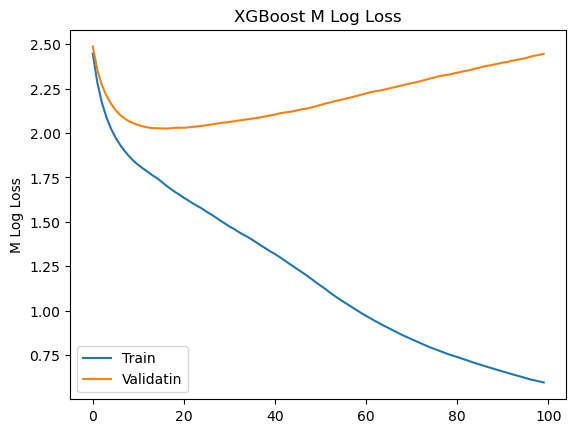

In [89]:
f_plt_performance(model, 'model_performance_test.png')

In [90]:
f_score(model, X_train, y_train, X_test, y_test)

(0.751, 0.25)

In [91]:
x_bd_c_cols

['01_x_c0',
 '01_x_c1',
 '01_x_c2',
 '01_x_c3',
 '02_x_c0',
 '02_x_c1',
 '02_x_c2',
 '02_x_c3']

In [92]:
# Xy -> Xy slide window shifts
def f_Xy_train_Xy_test(p_shift, p_df):
    lc_df_bd = p_df.copy()
    lc_df_bd, lc_x_bd_c_cols, lc_x_bd_b_cols = f_shifts(p_shift, lc_df_bd) # shift previous rows
    _, lc_X, lc_Y = f_XY(lc_df_bd, lc_x_bd_b_cols, lc_x_bd_c_cols) # X, Y
    _, lc_y_encoded =  f_y_encoded(lc_Y) # encoded y 
    lc_X_train, lc_X_test, lc_y_train, lc_y_test = f_split(lc_X, lc_y_encoded) # split
    
    return lc_X_train, lc_X_test, lc_y_train, lc_y_test

### 7. Building the models by increasing the sliding windows
###### Fit with all train data without a validation data set

In [93]:
%%time
n_shifts = 24
for i_shift in range(1, n_shifts):
    X_train, X_test, y_train, y_test = f_Xy_train_Xy_test(i_shift, df)
    model = f_model(X_train, y_train) # fit
#     model = f_model_early_stop(X_train, y_train, 0) # fit
    m_score, p_score = f_score(model, X_train, y_train, X_test, y_test)
#     print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    print(f"model score: {m_score:.3f} prediction score: {p_score:.3f} shift: {i_shift:03d} \
    {X_train.shape} {X_test.shape} {y_train.shape} {y_test.shape}")

model score: 0.521 prediction score: 0.250 shift: 001     (9983, 14) (16, 14) (9983,) (16,)
model score: 0.730 prediction score: 0.375 shift: 002     (9982, 32) (16, 32) (9982,) (16,)
model score: 0.843 prediction score: 0.375 shift: 003     (9981, 50) (16, 50) (9981,) (16,)
model score: 0.907 prediction score: 0.312 shift: 004     (9980, 68) (16, 68) (9980,) (16,)
model score: 0.939 prediction score: 0.375 shift: 005     (9979, 86) (16, 86) (9979,) (16,)
model score: 0.970 prediction score: 0.250 shift: 006     (9978, 104) (16, 104) (9978,) (16,)
model score: 0.981 prediction score: 0.125 shift: 007     (9977, 122) (16, 122) (9977,) (16,)
model score: 0.988 prediction score: 0.312 shift: 008     (9976, 140) (16, 140) (9976,) (16,)
model score: 0.994 prediction score: 0.250 shift: 009     (9975, 158) (16, 158) (9975,) (16,)
model score: 0.997 prediction score: 0.188 shift: 010     (9974, 176) (16, 176) (9974,) (16,)
model score: 0.999 prediction score: 0.312 shift: 011     (9973, 194) 

In [94]:
#  Confusion matrix
def f_confusion_plt(p_y_train, p_y_pred_train, p_m_classes, p_fig_png):
    cm = confusion_matrix(p_y_train, p_y_pred_train, labels=p_m_classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                       display_labels=m_classes)
    fig, ax = plt.subplots(figsize=(10,10))
    disp.plot(ax=ax)
    plt.savefig(p_fig_png)
    plt.show()

### 7.1 Model classification report

In [95]:
# model classification report
y_pred_train = model.predict(X_train.values)
print(classification_report(y_train, y_pred_train, zero_division = 1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3192
           1       1.00      1.00      1.00      1114
           2       1.00      1.00      1.00      1097
           3       1.00      1.00      1.00       196
           4       1.00      1.00      1.00      1126
           5       1.00      1.00      1.00       578
           6       1.00      1.00      1.00       202
           7       1.00      1.00      1.00        86
           8       1.00      1.00      1.00      1106
           9       1.00      1.00      1.00       179
          10       1.00      1.00      1.00       596
          11       1.00      1.00      1.00        93
          12       1.00      1.00      1.00       174
          13       1.00      1.00      1.00        96
          14       1.00      1.00      1.00        92
          15       1.00      1.00      1.00        34

    accuracy                           1.00      9961
   macro avg       1.00   

### 7.2 Model confusion matrix

In [96]:
m_classes = model.classes_
m_classes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [97]:
le.inverse_transform(m_classes)

array(['0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111',
       '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111'],
      dtype=object)

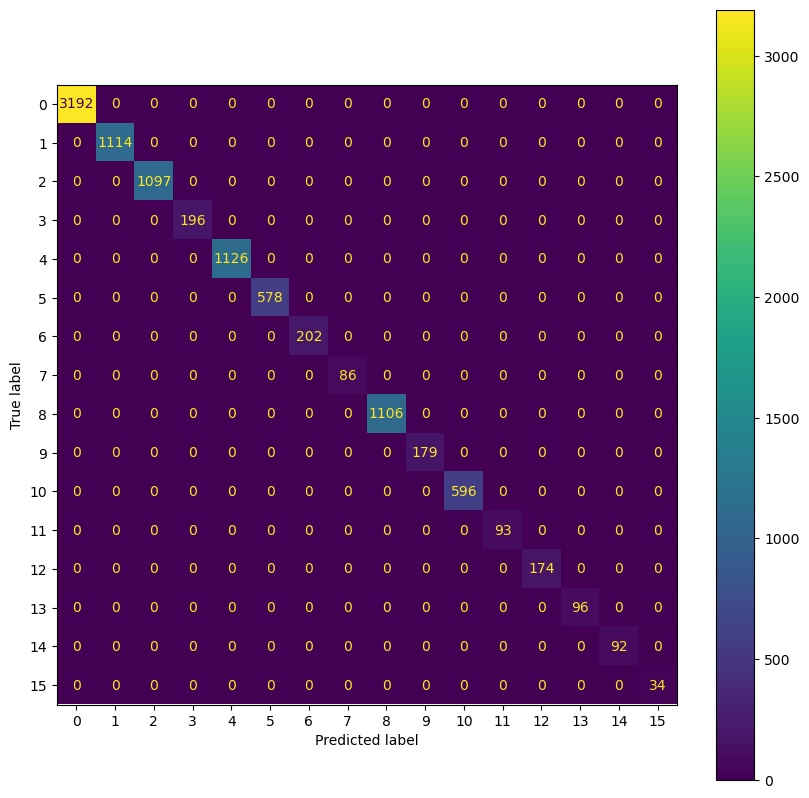

In [98]:
#  Model confusion matrix
f_confusion_plt(y_train, y_pred_train, m_classes, 'cf_mx_model_all_train.png')

### 7.3 Prediction classification report

In [99]:
# Prediction classification report
y_pred = model.predict(X_test.values)
print(classification_report(y_test, y_pred, zero_division = 1))

              precision    recall  f1-score   support

           0       0.45      0.71      0.56         7
           1       1.00      0.00      0.00         2
           2       0.00      1.00      0.00         0
           4       0.00      1.00      0.00         0
           5       1.00      0.00      0.00         1
           8       0.50      0.25      0.33         4
          10       1.00      0.00      0.00         2

    accuracy                           0.38        16
   macro avg       0.56      0.42      0.13        16
weighted avg       0.64      0.38      0.33        16



### 7.4 Prediction confusion matrix

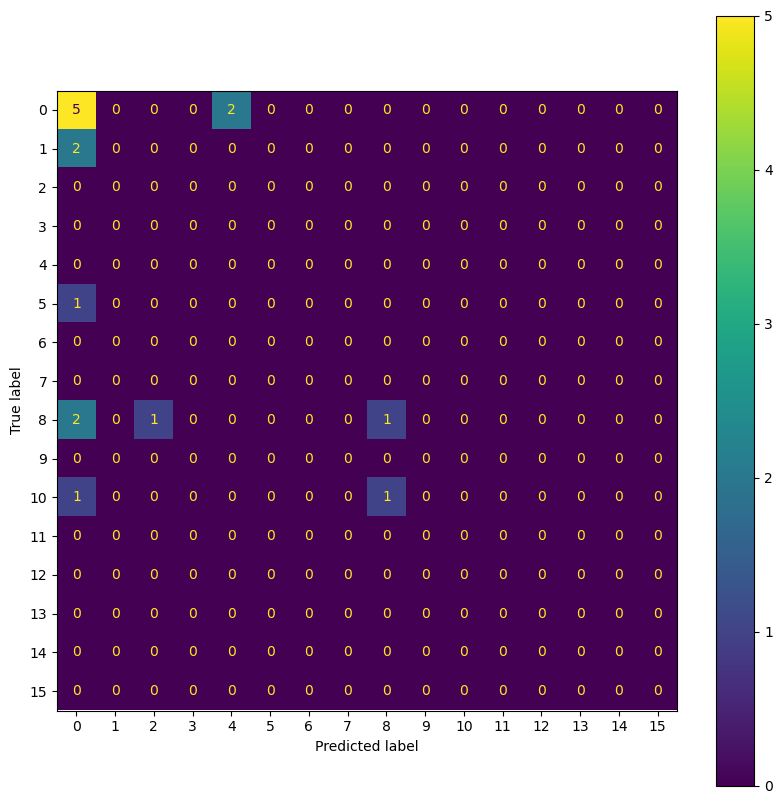

In [100]:
# Prediction confusion matrix
f_confusion_plt(y_test, y_pred, m_classes, 'cf_mx_pred_all_train.png')

### 8. Building models with validation data set by increasing the sliding windows
###### Allow overfitting to analyze model performance with train data. Early stoppping = 0

In [101]:
%%time
# n_shifts = 24 
for i_shift in range(1, n_shifts):
    X_train, X_test, y_train, y_test = f_Xy_train_Xy_test(i_shift, df)
#     model = f_model(X_train, y_train) # fit
    model = f_model_early_stop(X_train, y_train, 0) # fit with early stopping = 0
    m_score, p_score = f_score(model, X_train, y_train, X_test, y_test)
#     print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    print(f"model score: {m_score:.3f} prediction score: {p_score:.3f} shift: {i_shift:03d} \
    {X_train.shape} {X_test.shape} {y_train.shape} {y_test.shape}")

model score: 0.534 prediction score: 0.250 shift: 001     (9983, 14) (16, 14) (9983,) (16,)
model score: 0.675 prediction score: 0.188 shift: 002     (9982, 32) (16, 32) (9982,) (16,)
model score: 0.744 prediction score: 0.250 shift: 003     (9981, 50) (16, 50) (9981,) (16,)
model score: 0.783 prediction score: 0.312 shift: 004     (9980, 68) (16, 68) (9980,) (16,)
model score: 0.808 prediction score: 0.250 shift: 005     (9979, 86) (16, 86) (9979,) (16,)
model score: 0.810 prediction score: 0.438 shift: 006     (9978, 104) (16, 104) (9978,) (16,)
model score: 0.814 prediction score: 0.438 shift: 007     (9977, 122) (16, 122) (9977,) (16,)
model score: 0.816 prediction score: 0.375 shift: 008     (9976, 140) (16, 140) (9976,) (16,)
model score: 0.818 prediction score: 0.375 shift: 009     (9975, 158) (16, 158) (9975,) (16,)
model score: 0.821 prediction score: 0.375 shift: 010     (9974, 176) (16, 176) (9974,) (16,)
model score: 0.816 prediction score: 0.375 shift: 011     (9973, 194) 

In [102]:
df.shape

(9999, 21)

In [103]:
X_train.tail()

,00_x_b0,00_x_b1,00_x_b2,00_x_b3,00_x_b4,00_x_b5,00_x_b6,00_x_b7,00_x_b8,00_x_b9,00_x_b10,00_x_b11,00_x_b12,00_x_b13,01_x_b0,01_x_b1,01_x_b2,01_x_b3,01_x_b4,01_x_b5,01_x_b6,01_x_b7,01_x_b8,01_x_b9,01_x_b10,01_x_b11,01_x_b12,01_x_b13,02_x_b0,02_x_b1,02_x_b2,02_x_b3,02_x_b4,02_x_b5,02_x_b6,02_x_b7,02_x_b8,02_x_b9,02_x_b10,02_x_b11,02_x_b12,02_x_b13,03_x_b0,03_x_b1,03_x_b2,03_x_b3,03_x_b4,03_x_b5,03_x_b6,03_x_b7,03_x_b8,03_x_b9,03_x_b10,03_x_b11,03_x_b12,03_x_b13,04_x_b0,04_x_b1,04_x_b2,04_x_b3,04_x_b4,04_x_b5,04_x_b6,04_x_b7,04_x_b8,04_x_b9,04_x_b10,04_x_b11,04_x_b12,04_x_b13,05_x_b0,05_x_b1,05_x_b2,05_x_b3,05_x_b4,05_x_b5,05_x_b6,05_x_b7,05_x_b8,05_x_b9,05_x_b10,05_x_b11,05_x_b12,05_x_b13,06_x_b0,06_x_b1,06_x_b2,06_x_b3,06_x_b4,06_x_b5,06_x_b6,06_x_b7,06_x_b8,06_x_b9,06_x_b10,06_x_b11,06_x_b12,06_x_b13,07_x_b0,07_x_b1,07_x_b2,07_x_b3,07_x_b4,07_x_b5,07_x_b6,07_x_b7,07_x_b8,07_x_b9,07_x_b10,07_x_b11,07_x_b12,07_x_b13,08_x_b0,08_x_b1,08_x_b2,08_x_b3,08_x_b4,08_x_b5,08_x_b6,08_x_b7,08_x_b8,08_x_b9,08_x_b10,08_x_b11,08_x_b12,08_x_b13,09_x_b0,09_x_b1,09_x_b2,09_x_b3,09_x_b4,09_x_b5,09_x_b6,09_x_b7,09_x_b8,09_x_b9,09_x_b10,09_x_b11,09_x_b12,09_x_b13,10_x_b0,10_x_b1,10_x_b2,10_x_b3,10_x_b4,10_x_b5,10_x_b6,10_x_b7,10_x_b8,10_x_b9,10_x_b10,10_x_b11,10_x_b12,10_x_b13,11_x_b0,11_x_b1,11_x_b2,11_x_b3,11_x_b4,11_x_b5,11_x_b6,11_x_b7,11_x_b8,11_x_b9,11_x_b10,11_x_b11,11_x_b12,11_x_b13,12_x_b0,12_x_b1,12_x_b2,12_x_b3,12_x_b4,12_x_b5,12_x_b6,12_x_b7,12_x_b8,12_x_b9,12_x_b10,12_x_b11,12_x_b12,12_x_b13,13_x_b0,13_x_b1,13_x_b2,13_x_b3,13_x_b4,13_x_b5,13_x_b6,13_x_b7,13_x_b8,13_x_b9,13_x_b10,13_x_b11,13_x_b12,13_x_b13,14_x_b0,14_x_b1,14_x_b2,14_x_b3,14_x_b4,14_x_b5,14_x_b6,14_x_b7,14_x_b8,14_x_b9,14_x_b10,14_x_b11,14_x_b12,14_x_b13,15_x_b0,15_x_b1,15_x_b2,15_x_b3,15_x_b4,15_x_b5,15_x_b6,15_x_b7,15_x_b8,15_x_b9,15_x_b10,15_x_b11,15_x_b12,15_x_b13,16_x_b0,16_x_b1,16_x_b2,16_x_b3,16_x_b4,16_x_b5,16_x_b6,16_x_b7,16_x_b8,16_x_b9,16_x_b10,16_x_b11,16_x_b12,16_x_b13,17_x_b0,17_x_b1,17_x_b2,17_x_b3,17_x_b4,17_x_b5,17_x_b6,17_x_b7,17_x_b8,17_x_b9,17_x_b10,17_x_b11,17_x_b12,17_x_b13,18_x_b0,18_x_b1,18_x_b2,18_x_b3,18_x_b4,18_x_b5,18_x_b6,18_x_b7,18_x_b8,18_x_b9,18_x_b10,18_x_b11,18_x_b12,18_x_b13,19_x_b0,19_x_b1,19_x_b2,19_x_b3,19_x_b4,19_x_b5,19_x_b6,19_x_b7,19_x_b8,19_x_b9,19_x_b10,19_x_b11,19_x_b12,19_x_b13,20_x_b0,20_x_b1,20_x_b2,20_x_b3,20_x_b4,20_x_b5,20_x_b6,20_x_b7,20_x_b8,20_x_b9,20_x_b10,20_x_b11,20_x_b12,20_x_b13,21_x_b0,21_x_b1,21_x_b2,21_x_b3,21_x_b4,21_x_b5,21_x_b6,21_x_b7,21_x_b8,21_x_b9,21_x_b10,21_x_b11,21_x_b12,21_x_b13,22_x_b0,22_x_b1,22_x_b2,22_x_b3,22_x_b4,22_x_b5,22_x_b6,22_x_b7,22_x_b8,22_x_b9,22_x_b10,22_x_b11,22_x_b12,22_x_b13,01_x_c0,01_x_c1,01_x_c2,01_x_c3,02_x_c0,02_x_c1,02_x_c2,02_x_c3,03_x_c0,03_x_c1,03_x_c2,03_x_c3,04_x_c0,04_x_c1,04_x_c2,04_x_c3,05_x_c0,05_x_c1,05_x_c2,05_x_c3,06_x_c0,06_x_c1,06_x_c2,06_x_c3,07_x_c0,07_x_c1,07_x_c2,07_x_c3,08_x_c0,08_x_c1,08_x_c2,08_x_c3,09_x_c0,09_x_c1,09_x_c2,09_x_c3,10_x_c0,10_x_c1,10_x_c2,10_x_c3,11_x_c0,11_x_c1,11_x_c2,11_x_c3,12_x_c0,12_x_c1,12_x_c2,12_x_c3,13_x_c0,13_x_c1,13_x_c2,13_x_c3,14_x_c0,14_x_c1,14_x_c2,14_x_c3,15_x_c0,15_x_c1,15_x_c2,15_x_c3,16_x_c0,16_x_c1,16_x_c2,16_x_c3,17_x_c0,17_x_c1,17_x_c2,17_x_c3,18_x_c0,18_x_c1,18_x_c2,18_x_c3,19_x_c0,19_x_c1,19_x_c2,19_x_c3,20_x_c0,20_x_c1,20_x_c2,20_x_c3,21_x_c0,21_x_c1,21_x_c2,21_x_c3,22_x_c0,22_x_c1,22_x_c2,22_x_c3
9978,1,0,0,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1,1,0,1,1,1,1,1,0,1,0,1,0,0,1,1,0,1,1,1,1,1,0,0,1,1,0,0,1,1,0,1,1,1,1,1,0,0,0,1,0,0,1,1,0,1,1,1,1,0,1,1,1,1,0,0,1,1,0,1,1,1,1,0,1,1,0,1,0,0,1,1,0,1,1,1,1,0,1,0,1,1,0,0,1,1,0,1,1,1,1,0,1,0,0,1,0,0,1,1,0,1,1,1,1,0,0,1,1,1,0,0,1,1,0,1,1,1,1,0,0,1,0,1,0,0,1,1,0,1,1,1,1,0,0,0,1,1,0,0,1,1,0,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,1,0,1,1,1,1,1,0,0,1,1,0,1,1,1,0,1,1,1,0,1,0,0,1,1,0,1,1,1,0,1,1,0,1,1,0,0,1,1,0,1,1,1,0,1,1,0,0,1,0,0,1,1,0,1,1,1,0,1,0,1,1,1,0,0,1,1,0,1,1,1,0,1,0,1,0,1,0,0,1,1,0,1,1,1,0,1,0,0,1,1,0,0,1,1,0,1,1,1,0,1,0,0,0,1,0,0,1,1,0,1,1,1,0,0,1,1,1,1,0,0,1,1,0,1,1,1,0,0,1,1,0,1,0,0,

In [104]:
X_test.head()

,00_x_b0,00_x_b1,00_x_b2,00_x_b3,00_x_b4,00_x_b5,00_x_b6,00_x_b7,00_x_b8,00_x_b9,00_x_b10,00_x_b11,00_x_b12,00_x_b13,01_x_b0,01_x_b1,01_x_b2,01_x_b3,01_x_b4,01_x_b5,01_x_b6,01_x_b7,01_x_b8,01_x_b9,01_x_b10,01_x_b11,01_x_b12,01_x_b13,02_x_b0,02_x_b1,02_x_b2,02_x_b3,02_x_b4,02_x_b5,02_x_b6,02_x_b7,02_x_b8,02_x_b9,02_x_b10,02_x_b11,02_x_b12,02_x_b13,03_x_b0,03_x_b1,03_x_b2,03_x_b3,03_x_b4,03_x_b5,03_x_b6,03_x_b7,03_x_b8,03_x_b9,03_x_b10,03_x_b11,03_x_b12,03_x_b13,04_x_b0,04_x_b1,04_x_b2,04_x_b3,04_x_b4,04_x_b5,04_x_b6,04_x_b7,04_x_b8,04_x_b9,04_x_b10,04_x_b11,04_x_b12,04_x_b13,05_x_b0,05_x_b1,05_x_b2,05_x_b3,05_x_b4,05_x_b5,05_x_b6,05_x_b7,05_x_b8,05_x_b9,05_x_b10,05_x_b11,05_x_b12,05_x_b13,06_x_b0,06_x_b1,06_x_b2,06_x_b3,06_x_b4,06_x_b5,06_x_b6,06_x_b7,06_x_b8,06_x_b9,06_x_b10,06_x_b11,06_x_b12,06_x_b13,07_x_b0,07_x_b1,07_x_b2,07_x_b3,07_x_b4,07_x_b5,07_x_b6,07_x_b7,07_x_b8,07_x_b9,07_x_b10,07_x_b11,07_x_b12,07_x_b13,08_x_b0,08_x_b1,08_x_b2,08_x_b3,08_x_b4,08_x_b5,08_x_b6,08_x_b7,08_x_b8,08_x_b9,08_x_b10,08_x_b11,08_x_b12,08_x_b13,09_x_b0,09_x_b1,09_x_b2,09_x_b3,09_x_b4,09_x_b5,09_x_b6,09_x_b7,09_x_b8,09_x_b9,09_x_b10,09_x_b11,09_x_b12,09_x_b13,10_x_b0,10_x_b1,10_x_b2,10_x_b3,10_x_b4,10_x_b5,10_x_b6,10_x_b7,10_x_b8,10_x_b9,10_x_b10,10_x_b11,10_x_b12,10_x_b13,11_x_b0,11_x_b1,11_x_b2,11_x_b3,11_x_b4,11_x_b5,11_x_b6,11_x_b7,11_x_b8,11_x_b9,11_x_b10,11_x_b11,11_x_b12,11_x_b13,12_x_b0,12_x_b1,12_x_b2,12_x_b3,12_x_b4,12_x_b5,12_x_b6,12_x_b7,12_x_b8,12_x_b9,12_x_b10,12_x_b11,12_x_b12,12_x_b13,13_x_b0,13_x_b1,13_x_b2,13_x_b3,13_x_b4,13_x_b5,13_x_b6,13_x_b7,13_x_b8,13_x_b9,13_x_b10,13_x_b11,13_x_b12,13_x_b13,14_x_b0,14_x_b1,14_x_b2,14_x_b3,14_x_b4,14_x_b5,14_x_b6,14_x_b7,14_x_b8,14_x_b9,14_x_b10,14_x_b11,14_x_b12,14_x_b13,15_x_b0,15_x_b1,15_x_b2,15_x_b3,15_x_b4,15_x_b5,15_x_b6,15_x_b7,15_x_b8,15_x_b9,15_x_b10,15_x_b11,15_x_b12,15_x_b13,16_x_b0,16_x_b1,16_x_b2,16_x_b3,16_x_b4,16_x_b5,16_x_b6,16_x_b7,16_x_b8,16_x_b9,16_x_b10,16_x_b11,16_x_b12,16_x_b13,17_x_b0,17_x_b1,17_x_b2,17_x_b3,17_x_b4,17_x_b5,17_x_b6,17_x_b7,17_x_b8,17_x_b9,17_x_b10,17_x_b11,17_x_b12,17_x_b13,18_x_b0,18_x_b1,18_x_b2,18_x_b3,18_x_b4,18_x_b5,18_x_b6,18_x_b7,18_x_b8,18_x_b9,18_x_b10,18_x_b11,18_x_b12,18_x_b13,19_x_b0,19_x_b1,19_x_b2,19_x_b3,19_x_b4,19_x_b5,19_x_b6,19_x_b7,19_x_b8,19_x_b9,19_x_b10,19_x_b11,19_x_b12,19_x_b13,20_x_b0,20_x_b1,20_x_b2,20_x_b3,20_x_b4,20_x_b5,20_x_b6,20_x_b7,20_x_b8,20_x_b9,20_x_b10,20_x_b11,20_x_b12,20_x_b13,21_x_b0,21_x_b1,21_x_b2,21_x_b3,21_x_b4,21_x_b5,21_x_b6,21_x_b7,21_x_b8,21_x_b9,21_x_b10,21_x_b11,21_x_b12,21_x_b13,22_x_b0,22_x_b1,22_x_b2,22_x_b3,22_x_b4,22_x_b5,22_x_b6,22_x_b7,22_x_b8,22_x_b9,22_x_b10,22_x_b11,22_x_b12,22_x_b13,01_x_c0,01_x_c1,01_x_c2,01_x_c3,02_x_c0,02_x_c1,02_x_c2,02_x_c3,03_x_c0,03_x_c1,03_x_c2,03_x_c3,04_x_c0,04_x_c1,04_x_c2,04_x_c3,05_x_c0,05_x_c1,05_x_c2,05_x_c3,06_x_c0,06_x_c1,06_x_c2,06_x_c3,07_x_c0,07_x_c1,07_x_c2,07_x_c3,08_x_c0,08_x_c1,08_x_c2,08_x_c3,09_x_c0,09_x_c1,09_x_c2,09_x_c3,10_x_c0,10_x_c1,10_x_c2,10_x_c3,11_x_c0,11_x_c1,11_x_c2,11_x_c3,12_x_c0,12_x_c1,12_x_c2,12_x_c3,13_x_c0,13_x_c1,13_x_c2,13_x_c3,14_x_c0,14_x_c1,14_x_c2,14_x_c3,15_x_c0,15_x_c1,15_x_c2,15_x_c3,16_x_c0,16_x_c1,16_x_c2,16_x_c3,17_x_c0,17_x_c1,17_x_c2,17_x_c3,18_x_c0,18_x_c1,18_x_c2,18_x_c3,19_x_c0,19_x_c1,19_x_c2,19_x_c3,20_x_c0,20_x_c1,20_x_c2,20_x_c3,21_x_c0,21_x_c1,21_x_c2,21_x_c3,22_x_c0,22_x_c1,22_x_c2,22_x_c3
9983,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1,0,1,0,0,1,1,0,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1,1,1,0,0,1,0,0,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1,1,0,1,1,1,1,1,0,1,0,1,0,0,1,1,0,1,1,1,1,1,0,0,1,1,0,0,1,1,0,1,1,1,1,1,0,0,0,1,0,0,1,1,0,1,1,1,1,0,1,1,1,1,0,0,1,1,0,1,1,1,1,0,1,1,0,1,0,0,1,1,0,1,1,1,1,0,1,0,1,1,0,0,1,1,0,1,1,1,1,0,1,0,0,1,0,0,1,1,0,1,1,1,1,0,0,1,1,1,0,0,1,1,0,1,1,1,1,0,0,1,0,1,0,0,1,1,0,1,1,1,1,0,0,0,1,1,0,0,1,1,0,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,1,0,1,1,1,1,1,0,0,1,1,0,1,1,1,0,1,1,1,0,1,0,0,1,1,0,1,1,1,0,1,1,0,1,1,0,0,1,1,0,1,1,1,0,1,1,0,0,1,0,0,1,1,0,1,1,1,0,1,0,1,1,1,0,0,

In [105]:
X_test.tail()

,00_x_b0,00_x_b1,00_x_b2,00_x_b3,00_x_b4,00_x_b5,00_x_b6,00_x_b7,00_x_b8,00_x_b9,00_x_b10,00_x_b11,00_x_b12,00_x_b13,01_x_b0,01_x_b1,01_x_b2,01_x_b3,01_x_b4,01_x_b5,01_x_b6,01_x_b7,01_x_b8,01_x_b9,01_x_b10,01_x_b11,01_x_b12,01_x_b13,02_x_b0,02_x_b1,02_x_b2,02_x_b3,02_x_b4,02_x_b5,02_x_b6,02_x_b7,02_x_b8,02_x_b9,02_x_b10,02_x_b11,02_x_b12,02_x_b13,03_x_b0,03_x_b1,03_x_b2,03_x_b3,03_x_b4,03_x_b5,03_x_b6,03_x_b7,03_x_b8,03_x_b9,03_x_b10,03_x_b11,03_x_b12,03_x_b13,04_x_b0,04_x_b1,04_x_b2,04_x_b3,04_x_b4,04_x_b5,04_x_b6,04_x_b7,04_x_b8,04_x_b9,04_x_b10,04_x_b11,04_x_b12,04_x_b13,05_x_b0,05_x_b1,05_x_b2,05_x_b3,05_x_b4,05_x_b5,05_x_b6,05_x_b7,05_x_b8,05_x_b9,05_x_b10,05_x_b11,05_x_b12,05_x_b13,06_x_b0,06_x_b1,06_x_b2,06_x_b3,06_x_b4,06_x_b5,06_x_b6,06_x_b7,06_x_b8,06_x_b9,06_x_b10,06_x_b11,06_x_b12,06_x_b13,07_x_b0,07_x_b1,07_x_b2,07_x_b3,07_x_b4,07_x_b5,07_x_b6,07_x_b7,07_x_b8,07_x_b9,07_x_b10,07_x_b11,07_x_b12,07_x_b13,08_x_b0,08_x_b1,08_x_b2,08_x_b3,08_x_b4,08_x_b5,08_x_b6,08_x_b7,08_x_b8,08_x_b9,08_x_b10,08_x_b11,08_x_b12,08_x_b13,09_x_b0,09_x_b1,09_x_b2,09_x_b3,09_x_b4,09_x_b5,09_x_b6,09_x_b7,09_x_b8,09_x_b9,09_x_b10,09_x_b11,09_x_b12,09_x_b13,10_x_b0,10_x_b1,10_x_b2,10_x_b3,10_x_b4,10_x_b5,10_x_b6,10_x_b7,10_x_b8,10_x_b9,10_x_b10,10_x_b11,10_x_b12,10_x_b13,11_x_b0,11_x_b1,11_x_b2,11_x_b3,11_x_b4,11_x_b5,11_x_b6,11_x_b7,11_x_b8,11_x_b9,11_x_b10,11_x_b11,11_x_b12,11_x_b13,12_x_b0,12_x_b1,12_x_b2,12_x_b3,12_x_b4,12_x_b5,12_x_b6,12_x_b7,12_x_b8,12_x_b9,12_x_b10,12_x_b11,12_x_b12,12_x_b13,13_x_b0,13_x_b1,13_x_b2,13_x_b3,13_x_b4,13_x_b5,13_x_b6,13_x_b7,13_x_b8,13_x_b9,13_x_b10,13_x_b11,13_x_b12,13_x_b13,14_x_b0,14_x_b1,14_x_b2,14_x_b3,14_x_b4,14_x_b5,14_x_b6,14_x_b7,14_x_b8,14_x_b9,14_x_b10,14_x_b11,14_x_b12,14_x_b13,15_x_b0,15_x_b1,15_x_b2,15_x_b3,15_x_b4,15_x_b5,15_x_b6,15_x_b7,15_x_b8,15_x_b9,15_x_b10,15_x_b11,15_x_b12,15_x_b13,16_x_b0,16_x_b1,16_x_b2,16_x_b3,16_x_b4,16_x_b5,16_x_b6,16_x_b7,16_x_b8,16_x_b9,16_x_b10,16_x_b11,16_x_b12,16_x_b13,17_x_b0,17_x_b1,17_x_b2,17_x_b3,17_x_b4,17_x_b5,17_x_b6,17_x_b7,17_x_b8,17_x_b9,17_x_b10,17_x_b11,17_x_b12,17_x_b13,18_x_b0,18_x_b1,18_x_b2,18_x_b3,18_x_b4,18_x_b5,18_x_b6,18_x_b7,18_x_b8,18_x_b9,18_x_b10,18_x_b11,18_x_b12,18_x_b13,19_x_b0,19_x_b1,19_x_b2,19_x_b3,19_x_b4,19_x_b5,19_x_b6,19_x_b7,19_x_b8,19_x_b9,19_x_b10,19_x_b11,19_x_b12,19_x_b13,20_x_b0,20_x_b1,20_x_b2,20_x_b3,20_x_b4,20_x_b5,20_x_b6,20_x_b7,20_x_b8,20_x_b9,20_x_b10,20_x_b11,20_x_b12,20_x_b13,21_x_b0,21_x_b1,21_x_b2,21_x_b3,21_x_b4,21_x_b5,21_x_b6,21_x_b7,21_x_b8,21_x_b9,21_x_b10,21_x_b11,21_x_b12,21_x_b13,22_x_b0,22_x_b1,22_x_b2,22_x_b3,22_x_b4,22_x_b5,22_x_b6,22_x_b7,22_x_b8,22_x_b9,22_x_b10,22_x_b11,22_x_b12,22_x_b13,01_x_c0,01_x_c1,01_x_c2,01_x_c3,02_x_c0,02_x_c1,02_x_c2,02_x_c3,03_x_c0,03_x_c1,03_x_c2,03_x_c3,04_x_c0,04_x_c1,04_x_c2,04_x_c3,05_x_c0,05_x_c1,05_x_c2,05_x_c3,06_x_c0,06_x_c1,06_x_c2,06_x_c3,07_x_c0,07_x_c1,07_x_c2,07_x_c3,08_x_c0,08_x_c1,08_x_c2,08_x_c3,09_x_c0,09_x_c1,09_x_c2,09_x_c3,10_x_c0,10_x_c1,10_x_c2,10_x_c3,11_x_c0,11_x_c1,11_x_c2,11_x_c3,12_x_c0,12_x_c1,12_x_c2,12_x_c3,13_x_c0,13_x_c1,13_x_c2,13_x_c3,14_x_c0,14_x_c1,14_x_c2,14_x_c3,15_x_c0,15_x_c1,15_x_c2,15_x_c3,16_x_c0,16_x_c1,16_x_c2,16_x_c3,17_x_c0,17_x_c1,17_x_c2,17_x_c3,18_x_c0,18_x_c1,18_x_c2,18_x_c3,19_x_c0,19_x_c1,19_x_c2,19_x_c3,20_x_c0,20_x_c1,20_x_c2,20_x_c3,21_x_c0,21_x_c1,21_x_c2,21_x_c3,22_x_c0,22_x_c1,22_x_c2,22_x_c3
9994,1,0,0,1,1,1,0,0,0,0,1,0,1,1,1,0,0,1,1,1,0,0,0,0,1,0,1,0,1,0,0,1,1,1,0,0,0,0,1,0,0,1,1,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,1,1,0,1,0,0,1,1,1,0,0,0,0,0,1,0,1,1,0,0,1,1,1,0,0,0,0,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,1,1,1,1,1,0,1,0,0,1,1,0,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1,1,1,0,0,1,0,0,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1,1,0,1,1,1,1,1,0,1,0,1,0,0,1,1,0,1,1,1,1,1,0,0,1,1,0,0,1,1,0,1,1,1,1,1,0,0,0,1,0,0,1,1,0,1,1,1,1,0,1,1,1,1,0,0,1,1,0,1,1,1,1,0,1,1,0,1,0,0,

### 8.1 Model classification report

In [106]:
# model classification report
y_pred_train = model.predict(X_train.values)
print(classification_report(y_train, y_pred_train, zero_division = 1))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83      3192
           1       0.83      0.79      0.81      1114
           2       0.86      0.78      0.82      1097
           3       0.88      0.75      0.81       196
           4       0.83      0.79      0.81      1126
           5       0.91      0.79      0.84       578
           6       0.87      0.80      0.83       202
           7       0.97      0.70      0.81        86
           8       0.81      0.82      0.82      1106
           9       0.90      0.77      0.83       179
          10       0.94      0.75      0.83       596
          11       0.97      0.75      0.85        93
          12       0.87      0.75      0.81       174
          13       0.92      0.83      0.87        96
          14       0.94      0.79      0.86        92
          15       0.96      0.76      0.85        34

    accuracy                           0.82      9961
   macro avg       0.89   

In [107]:
y_test.shape, y_train.shape

((16,), (9961,))

### 8.2 Model confusion matrix

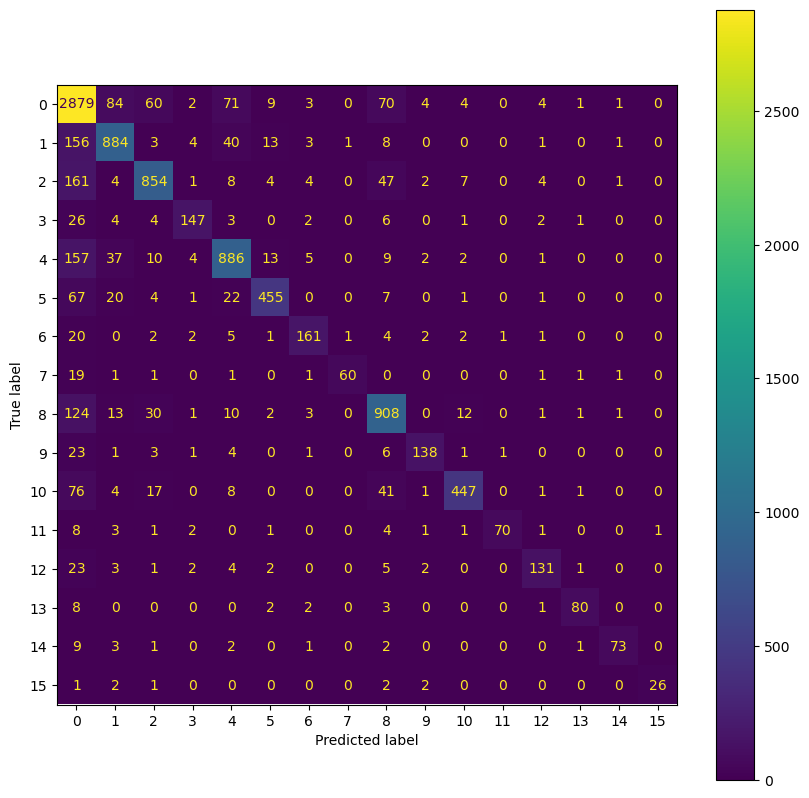

In [108]:
#  Model confusion matrix
f_confusion_plt(y_train, y_pred_train, m_classes, 'cf_mx_model.png')

In [109]:
display(y_test)
display(y_pred)

array([ 0,  1,  0, 10,  8,  0, 10,  0,  5,  0,  0,  0,  8,  8,  1,  8])

array([0, 0, 4, 8, 2, 4, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0], dtype=int64)

### 8.3 Prediction classification report

In [110]:
# Prediction classification report
y_pred = model.predict(X_test.values)
print(classification_report(y_test, y_pred, zero_division = 1))

              precision    recall  f1-score   support

           0       0.36      0.57      0.44         7
           1       0.00      0.00      0.00         2
           2       0.00      1.00      0.00         0
           4       0.00      1.00      0.00         0
           5       1.00      0.00      0.00         1
           8       1.00      0.00      0.00         4
          10       1.00      0.00      0.00         2
          11       0.00      1.00      0.00         0

    accuracy                           0.25        16
   macro avg       0.42      0.45      0.06        16
weighted avg       0.60      0.25      0.19        16



### 8.4 Prediction confusion matrix

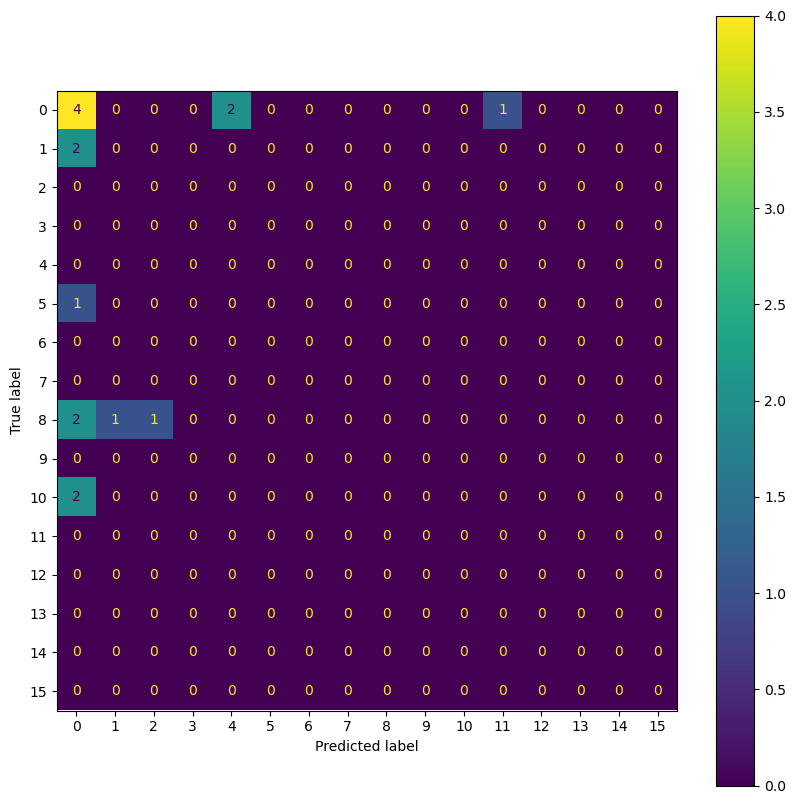

In [111]:
# Prediction confusion matrix
f_confusion_plt(y_test, y_pred, m_classes, 'cf_mx_pred.png')

### 8.5 Model performance

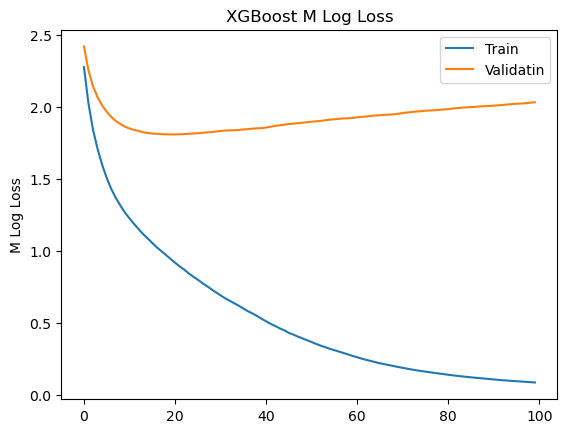

In [112]:
# Model performance
f_plt_performance(model, 'model_performance.png')

### 9. Building models with validation data set by increasing the sliding windows
###### Stop overfitting to analyze model performance with validation data. Early stopping = 10.

In [113]:
%%time
# n_shifts = 24
for i_shift in range(1, n_shifts):
    X_train, X_test, y_train, y_test = f_Xy_train_Xy_test(i_shift, df)
#     model = f_model(X_train, y_train) # fit
    model = f_model_early_stop(X_train, y_train, 10) # fit with early stopping = 10
    m_score, p_score = f_score(model, X_train, y_train, X_test, y_test)
#     print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    print(f"model score: {m_score:.3f} prediction score: {p_score:.3f} shift: {i_shift:03d} \
    {X_train.shape} {X_test.shape} {y_train.shape} {y_test.shape}")

model score: 0.329 prediction score: 0.375 shift: 001     (9983, 14) (16, 14) (9983,) (16,)
model score: 0.373 prediction score: 0.438 shift: 002     (9982, 32) (16, 32) (9982,) (16,)
model score: 0.377 prediction score: 0.438 shift: 003     (9981, 50) (16, 50) (9981,) (16,)
model score: 0.402 prediction score: 0.375 shift: 004     (9980, 68) (16, 68) (9980,) (16,)
model score: 0.439 prediction score: 0.375 shift: 005     (9979, 86) (16, 86) (9979,) (16,)
model score: 0.467 prediction score: 0.312 shift: 006     (9978, 104) (16, 104) (9978,) (16,)
model score: 0.508 prediction score: 0.375 shift: 007     (9977, 122) (16, 122) (9977,) (16,)
model score: 0.529 prediction score: 0.375 shift: 008     (9976, 140) (16, 140) (9976,) (16,)
model score: 0.542 prediction score: 0.375 shift: 009     (9975, 158) (16, 158) (9975,) (16,)
model score: 0.579 prediction score: 0.500 shift: 010     (9974, 176) (16, 176) (9974,) (16,)
model score: 0.547 prediction score: 0.375 shift: 011     (9973, 194) 

### 9.1 Model classification report

In [114]:
# model classification report
y_pred_train = model.predict(X_train.values)
print(classification_report(y_train, y_pred_train, zero_division = 1))

              precision    recall  f1-score   support

           0       0.59      0.87      0.70      3192
           1       0.70      0.61      0.65      1114
           2       0.70      0.60      0.64      1097
           3       0.73      0.51      0.60       196
           4       0.71      0.60      0.65      1126
           5       0.84      0.56      0.67       578
           6       0.77      0.48      0.59       202
           7       0.93      0.50      0.65        86
           8       0.66      0.60      0.63      1106
           9       0.76      0.23      0.35       179
          10       0.88      0.49      0.63       596
          11       1.00      0.29      0.45        93
          12       0.82      0.55      0.66       174
          13       0.91      0.70      0.79        96
          14       0.97      0.65      0.78        92
          15       0.93      0.76      0.84        34

    accuracy                           0.66      9961
   macro avg       0.81   

### 9.2 Model confusion matrix

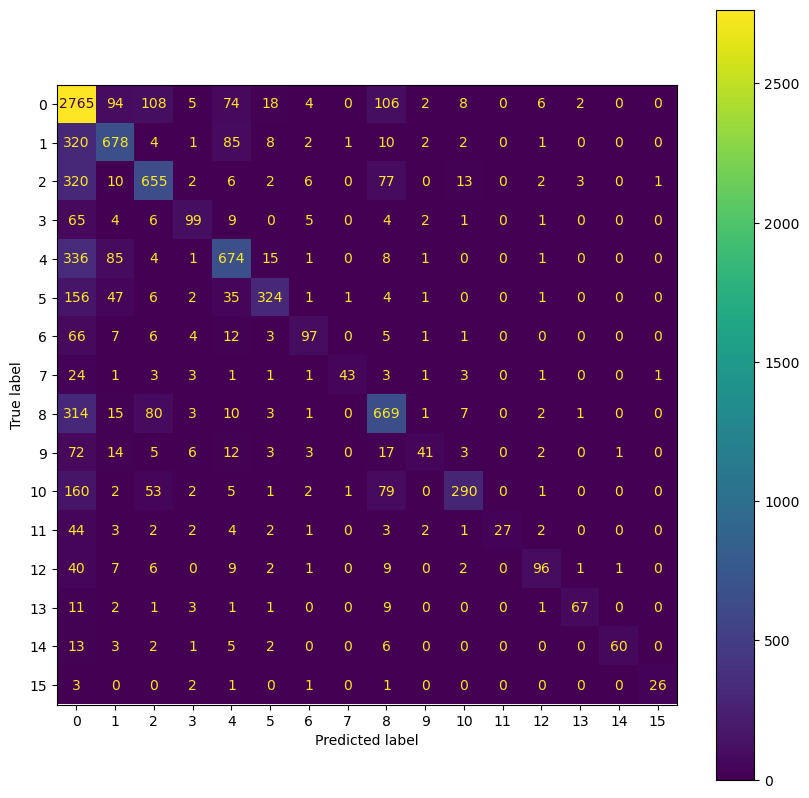

In [115]:
#  Model confusion matrix
f_confusion_plt(y_train, y_pred_train, m_classes, 'cf_mx_model_early_stop.png')

### 9.3 Prediction classification report

In [116]:
# Prediction classification report
y_pred = model.predict(X_test.values)
print(classification_report(y_test, y_pred, zero_division = 1))

              precision    recall  f1-score   support

           0       0.42      0.71      0.53         7
           1       1.00      0.00      0.00         2
           4       0.00      1.00      0.00         0
           5       1.00      0.00      0.00         1
           6       0.00      1.00      0.00         0
           8       1.00      0.25      0.40         4
          10       0.00      0.00      0.00         2

    accuracy                           0.38        16
   macro avg       0.49      0.42      0.13        16
weighted avg       0.62      0.38      0.33        16



### 9.4 Prediction confusion matrix

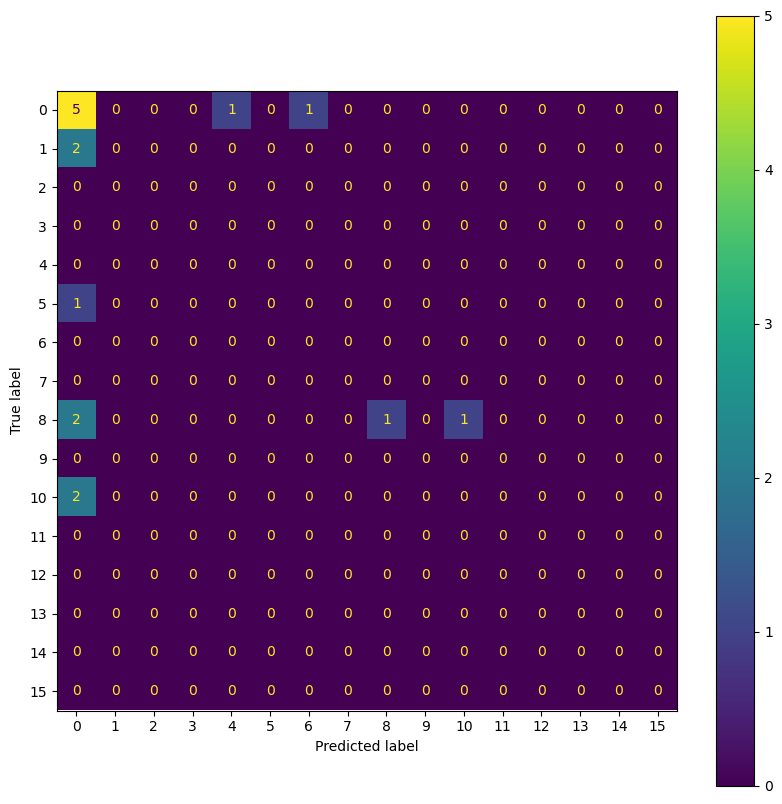

In [117]:
# Prediction confusion matrix
f_confusion_plt(y_test, y_pred, m_classes, 'cf_mx_pred_early_stop.png')

### 9.5 Model performance

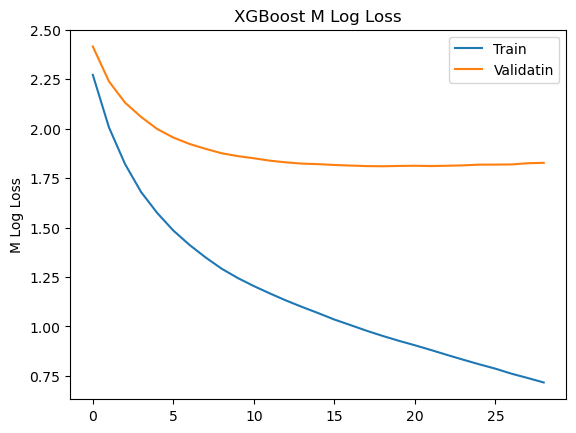

In [118]:
# Model performance
f_plt_performance(model, 'model_performance_early_stop.png')